## 중간고사
- 작성한 jupyternotebook file: 중간고사_성명_학번으로 자장한 후 www.webhard.co.kr 올리기 folder의 중간고사 folder에 저장하시오<br>

- www.webhard.co.kr에 있는 tatanic dataset을 download한 후 다음 물음에 답하시오

#### 읽어들인 Dataset의 각 key 값은 다음과 같음
- survived: 생존여부, 	0: 사망, 1: 생존
- pclass: 티켓의 class	
- sex: 성별	
- age: 나이	
- sibsp: 함께 탑승한 형제와 배우자의 수	
- parch: 함께 탑승한 부모, 아이의 수	
- fare: 탑승료	
- embarked: 탑승항구  C=Cherbourg, Q=Queenstown, S=Southampton
- class: 객실 등급	
- who: 남자, 여자, 어린이로 구분
- adult_male: 성인남자 여부	
- deck: 객실 바닥	
- embark_town: 	Cherbourg, Queenstown, Southampton
- alive: 생존여부	
- alone: 단독승선여부

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') # 스타일 지정

titanic = sns.load_dataset('titanic')
#titanic = pd.read_csv('C:\dataset/titanic.txt', delimiter='\t')
#titanic.head()

### 문제 1: sex,  class중 survived에 가장 중요한 변수는 무엇인가?. 그 의미는 무엇때문인지 data분석을 통해 설명하시오

In [13]:
print(titanic.groupby('sex')['survived'].mean())
print()
print(titanic.groupby('class')['survived'].mean())

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


[정답의 예]<br>
sex<br>
female    0.742038<br>
male      0.188908

### 문제 2: 승객 중 제일 나이 많은 탑승객, ,제일 어린 탑승객, 탑승객의 평균 나이를 출력하시오 

In [6]:
print('제일 나이 많은 탑승객 : %5.1f Years' % titanic['age'].max())
print('제일 어린 탑승객 : %5.1f Years' % titanic['age'].min())
print('탑승객 평균 나이 : %5.1f Years' % titanic['age'].mean())

제일 나이 많은 탑승객 :  80.0 Years
제일 어린 탑승객 :   0.4 Years
탑승객 평균 나이 :  29.7 Years


[정답의 예]<br>
제일 나이 많은 탑승객 : 80.0 Years<br>
제일 어린 탑승객 : 0.4 Years<br>
탑승객 평균 나이 : 29.7 Years

### 문제 3: 승객 나이를 15세 구간으로 나누어 각 구간의 생존 인원수와 생존자의 비율을 계산하시오

In [7]:
titanic['age_bucket'] = titanic['age']//15*15
age_bucket = pd.DataFrame(titanic.groupby('age_bucket')['survived'].sum())
age_bucket.reset_index()

,age_bucket,survived
0,0.0,45
1,15.0,111
2,30.0,91
3,45.0,36
4,60.0,6
5,75.0,1


[정답의 예]<br>


age_bucket |survived
:-----: | :-----:
0.0 | 45    
15.0 | 111    
30.0 | 91
45.0 | 36
60.0 | 6
75.0 | 1

In [9]:
titanic['age_bucket'] = titanic['age']//15*15
age_bucket = pd.DataFrame(titanic.groupby('age_bucket')['survived'].mean())
age_bucket.reset_index()

,age_bucket,survived
0,0.0,0.576923
1,15.0,0.362745
2,30.0,0.423256
3,45.0,0.404494
4,60.0,0.240000
5,75.0,1.000000


[정답의 예]<br>


age_bucket |survived
:-----: | :-----:
0.0	| 0.576923
15.0 |	0.362745
30.0 |	0.423256
45.0 |	0.404494
60.0 |	0.240000
75.0 |	1.000000

# ================
# 중간고사 문제 끝
# ================

# 그래프 그리기. & 타이타닉 데이터 분석
# =================

## 1. 아래 그래프는 나이와 생존인원수에 관한 그래프이다(남,녀 구분x)
### 남,여 통틀어 생존인원수는 10~20대가 제일 많았다.
### 그에 반면 생존인원수가 60~70대에는 바닥을 치는데, 이는 처음 배를탄 60대 이상 인원이 별로 없을수도 없다. (이 그래프로는 알 수 없음)
### 즉, 이 그래프는 나이에 따른 생존 인원수를 보여주지만, 처음 탑승 인원이 나와있지 않으므로, 10~20대가 생존자가 많은만큼 생존율이 높은지 65세 이상이 생존자가 적은만큼 생존율이 적은지 알 수 없다.

### 그렇다면, 2번 그래프에서 생존율을 확인해보자!

Text(0, 0.5, 'survived')

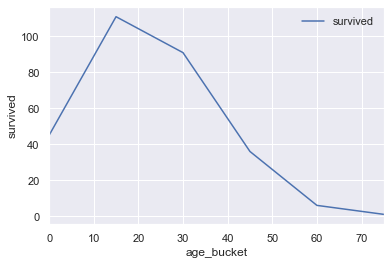

In [24]:
age_bucket = pd.DataFrame(titanic.groupby('age_bucket')['survived'].sum()).plot()
plt.ylabel('survived')

## 2. 아래 그래프는 나이에 따른 생존율 그래프이다(남,녀 구분x)
### 위 1번 생존수에 관한 그래프와는 다른 정반대 결과가 나왔다.
### 1번 그래프에서 생존수가 가장 많았던 10~20대의 생존율은 40\% 미만으로 나왔고,생존수가 가장 적었던 60대 이상은 높은 생존율을 보여주었다.

### 1번 그래프와 취합하여 보면, 10\~20대는 생존자가 많았지만 생존율이 낮았다. 65세 이상은 생존자가 적었지만 생존율이 높았다.

### 즉, 10\~20대는 많이 타고 많이 죽었고, 65세 이상은 적게 타고 적게 죽었다... 

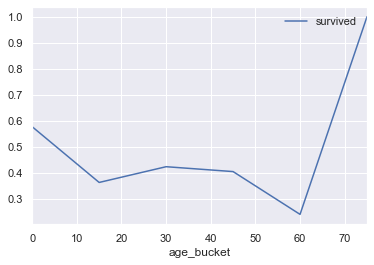

In [26]:
age_bucket = pd.DataFrame(titanic.groupby('age_bucket')['survived'].mean()).plot()

## 3. 아래 그래프는 성별과 나이에 따른 데이터이다.
### 남자는 65세 이상 50%이상의 생존율을 유지했고 특히 10~60대 남성들은 생존율이 20%가 넘지 않았다.
### 여자는 가장낮은 나이 생존율이 0\~10대이며, 50\~60대의 생존율이 제일 높다.
### 즉, 10대~60대 남자들은... 배를 타서 사고가 나면 대부분 죽는다... (비행기타자!)

Text(0, 0.5, 'survived')

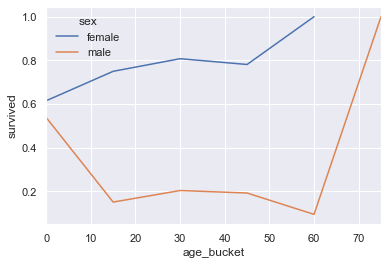

In [25]:
sns.set()  # use Seaborn styles
titanic.pivot_table('survived','age_bucket', columns='sex', aggfunc='mean').plot()
plt.ylabel('survived')

## 4. 아래 그래프는 class등급에따른 나이별 생존율 그래프이다
### 대부분의 모든 나이대에서 First class가 생존율이 높다. (역시 돈이 비싸면 비싼 값을 하는것같다.)
### 하지만 60대에서는 First,Second,Third 생존율이 비슷하게 나왔다.(60대에는... First석이 소용없다..)

### 즉, 이 그래프는 확실히 비싼 돈을 준 First class의 생존율이 높지만, 60대는 어떤 class든 생존율이 똑같으니 싼 Third class 을 선택해도 될 듯 하다....

Text(0, 0.5, 'survived')

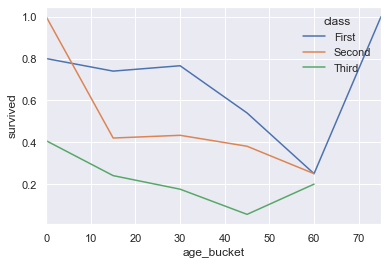

In [28]:
titanic.pivot_table('survived','age_bucket', columns='class', aggfunc='mean').plot()
plt.ylabel('survived')

## 5. 아래 그래프는 parch(함께 탑승한 부모 또는 자녀 수)에 따른 나이별 생존율 그래프이다
### 대부분의 parch 에서 뒤죽박죽 인 데이터지만, 유독 parch가 4인 값에는 생존율이 0\%였다.
### 함께 탑승한 부모 또는 자녀 수가 4명이면..? 위험한것 같다.
### 혹시나 parch 4 값이 0 인가해서 print(titanic.groupby('parch')['survived'].size()) 를 통해 찾아 봤지만 아니였다.

### 즉, 배를 함께 탈때는 생존율이 좋은 2명이 제일 인상적이다

Text(0, 0.5, 'survived')

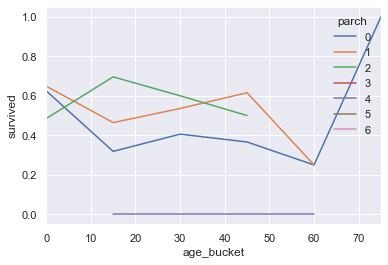

In [36]:
titanic.pivot_table('survived','age_bucket', columns='parch', aggfunc='mean').plot()
plt.ylabel('survived')

## 6. 아래 그래프는embarked(탑승 장소에)에 따른 나이별 생존율 그래프이다
### 평균적으로 가장 높은 생존율을 보인 지역은 C(Cherbourg) 이고, 가장 낮은 지역은 Q(Queenstown)이다

### 즉, 이 그래프를 통해서는 탑승 장소에 따라서도 생존율이 다르다는걸 보여주는데... 신빙성이 있는지는 솔직히 모르겠따..

embarked
C    168
Q     77
S    644
Name: survived, dtype: int64


Text(0, 0.5, 'survived')

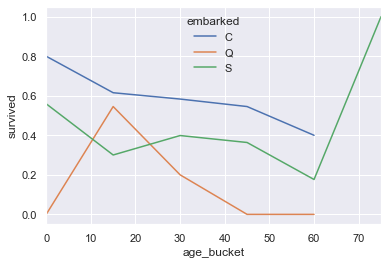

In [41]:
print(titanic.groupby('embarked')['survived'].size())
titanic.pivot_table('survived','age_bucket', columns='embarked', aggfunc='mean').plot()
plt.ylabel('survived')